In [1]:
import torch
import os
from Padim.padim import Padim
from Padim.visualization import heatmap_images, heatmap_image
from PIL import Image, ImageQt
from Padim.utils import standard_image_transform
import cv2
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Admin\AppData\Local\Temp\ipykernel_9548\729311371.py:5: DeprecationWarning: Support for PyQt5 is deprecated and will be removed in Pillow 10 (2023-07-01). Use PyQt6 or PySide6 instead.
  from PIL import Image, ImageQt


In [13]:
MODEL_DATA_PATH = './Padim/save_model'
mean = torch.load(os.path.join(MODEL_DATA_PATH, 'mean.pt'))
cov_inv = torch.load(os.path.join(MODEL_DATA_PATH, 'cov_inv.pt'))
channel_indices = torch.load(os.path.join(MODEL_DATA_PATH, 'channel_indices.pt'))
padim_model = Padim(backbone='resnet18', 
                    mean=mean, 
                    cov_inv=cov_inv, 
                    channel_indices = channel_indices,
                    device=torch.device('cpu'))

In [55]:
img = cv2.imread('./test_img/000.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [56]:
image = Image.fromarray(img).convert('RGB')
transformed_images = standard_image_transform(image).unsqueeze(0) #1x3xhxW
# get model output
image_scores, score_maps = padim_model.predict(transformed_images)

In [57]:
score_maps.shape

torch.Size([1, 224, 224])

In [58]:
image_scores

tensor([10.4533])

In [59]:
type(image_scores.item())

float

In [60]:
img.shape

(900, 900, 3)

In [61]:
THRESH = 13
heatmap = heatmap_image(img, score_maps[0], min_v=0, max_v=THRESH, alpha=0.5) # 1xHxWxC

In [62]:
heatmap.shape

(900, 900, 3)

In [63]:
heatmap.shape

(900, 900, 3)

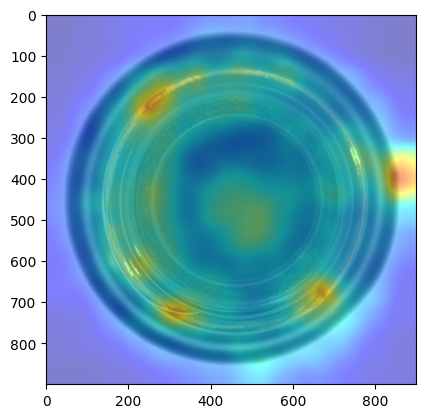

In [64]:
import matplotlib.pyplot as plt
plt.imshow(heatmap)

In [2]:
mean = 0
std = 250
img = cv2.imread('test_img/001.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
noise = np.random.normal(mean, std, img.shape).astype(np.int8)
img_aug = np.clip(img + noise, 0, 255)

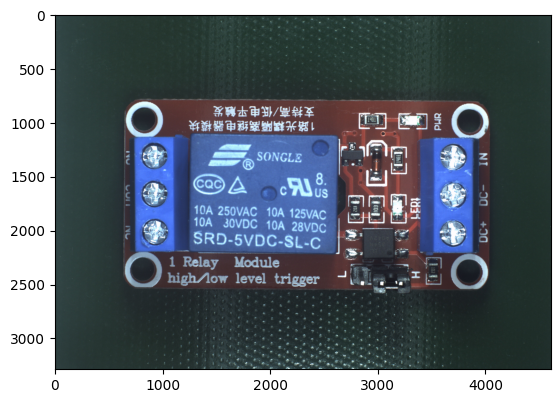

In [47]:
plt.imshow(img)

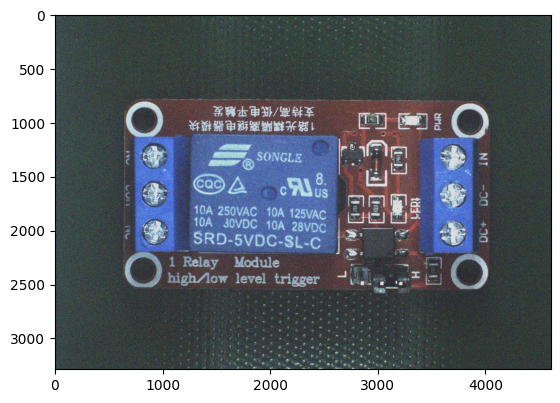

In [48]:
plt.imshow(img_aug)

In [7]:
img_flip = np.flip(img, axis=1)

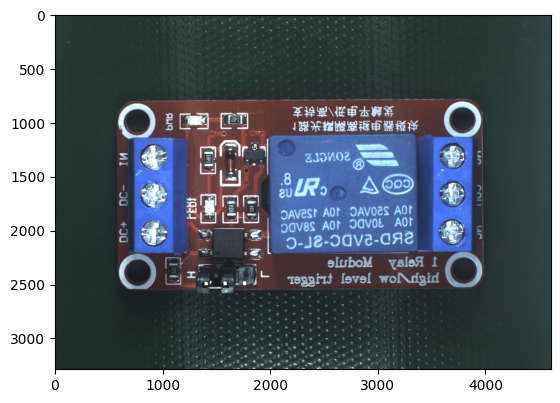

In [8]:
plt.imshow(img_flip)

In [9]:
from scipy import ndimage

In [14]:
img_rotated = ndimage.rotate(img, 10, reshape=False, mode='mirror')

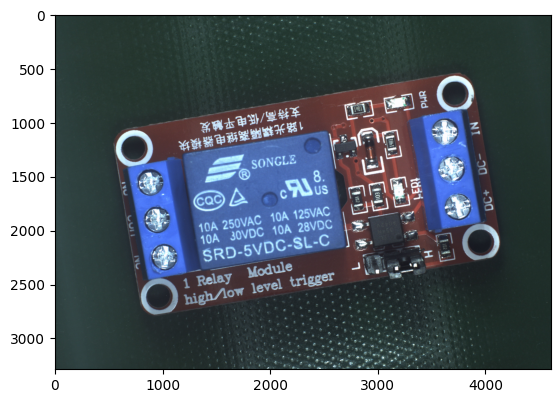

In [15]:
plt.imshow(img_rotated)

In [4]:
from data_augmentation import data_augmentation

In [5]:
aug = data_augmentation('test_img')

In [ ]:
aug.run(10, 'test_aug')

 10%|████████▎                                                                          | 1/10 [00:06<00:56,  6.29s/it]

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [14]:
def augment_flip_0(img, p=0.5):
    rdn = np.random.rand()
    img_flip = img
    if rdn < p:
        img_flip = np.flip(img, axis=0)
    return img_flip

In [15]:
def augment_flip_1(img, p=0.5):
    rdn = np.random.rand()
    img_flip = img
    if rdn < p:
        img_flip = np.flip(img, axis=1)
    return img_flip


In [5]:
img = cv2.imread('test_img/001.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

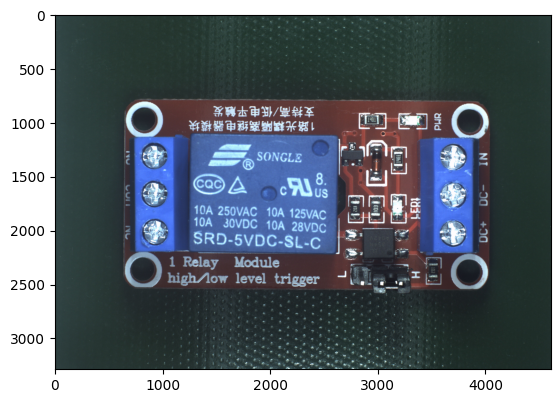

In [6]:
plt.imshow(img)

In [18]:
img_flip = augment_flip_1(img, p=1)

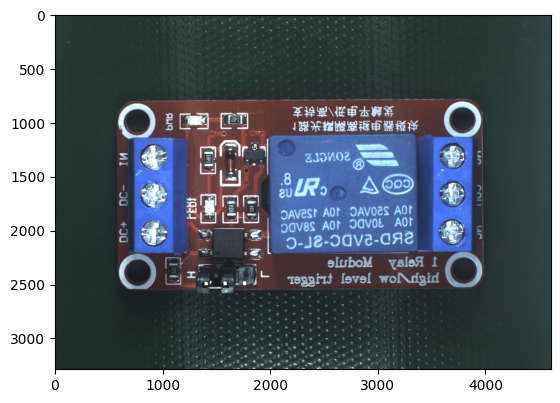

In [19]:
plt.imshow(img_flip)

In [27]:
def add_noise(img, mean=0, std=300, p=0.5):
    # add white noise
    rdn = np.random.rand()
    img_noise = img
    if rdn < p:
        noise = np.random.normal(mean, std, img.shape).astype(np.int8)
        img_noise = img + noise
        img_noise = np.clip(img_noise, 0, 255)
    return img_noise

In [28]:
from scipy import ndimage
def augment_rotate(img, max_angle=10, p=0.5):
    rdn = np.random.rand()
    img_rotated = img
    if rdn < p:
        angle = np.random.uniform(low=-max_angle, high=max_angle)
        img_rotated = ndimage.rotate(img, angle, reshape=False, mode='mirror')
    return img_rotated


In [37]:
np.random.uniform(low=0, high=10)

8.766912781829241

In [35]:
img_noise = add_noise(img, p=1)

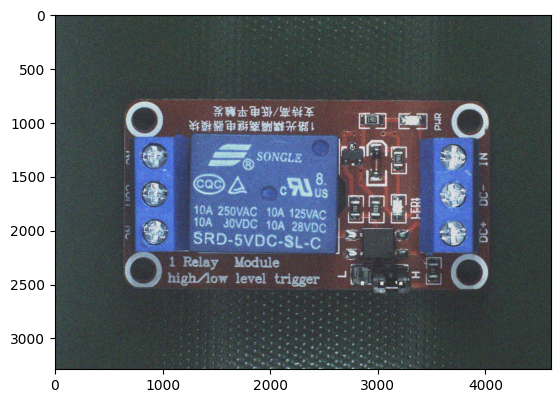

In [25]:
plt.imshow(img_noise)

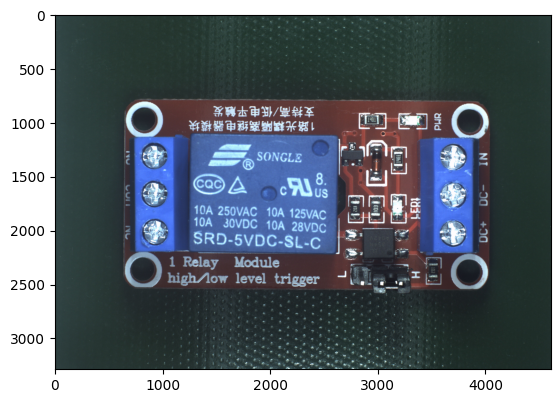

In [26]:
plt.imshow(img)

In [42]:
img_rot = augment_rotate(img, max_angle=30, p=1)

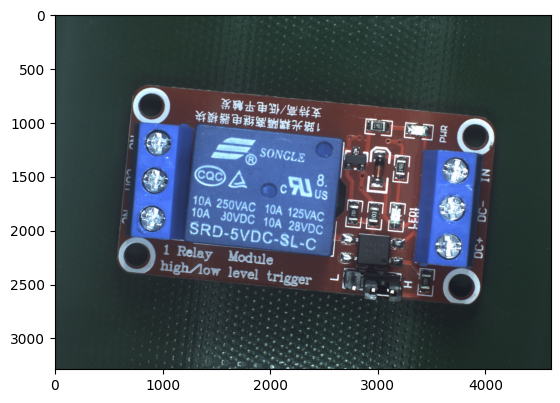

In [43]:
plt.imshow(img_rot)

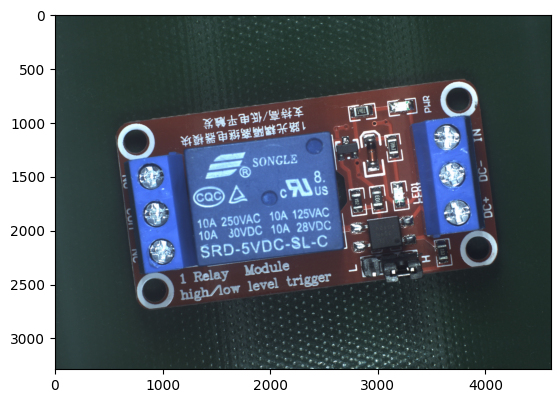

In [38]:
img_rot = augment_rotate(img, p=1)
plt.imshow(img_rot)